In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns

In [2]:
data1 = pd.read_csv(r"C:\Users\AYUSH KUMAR GUPTA\Downloads\Technixia\Problem\data\train_features.csv")
test = pd.read_csv(r"C:\Users\AYUSH KUMAR GUPTA\Downloads\Technixia\Problem\data\test_features.csv")

In [3]:
test1=test.copy()

In [4]:
data1.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16


In [5]:
data2=pd.read_csv(r"C:\Users\AYUSH KUMAR GUPTA\Downloads\Technixia\Problem\data\train_salaries.csv")

In [6]:
data= pd.merge(data1,data2,on="jobId")

In [7]:
data.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


In [8]:
data.info()
data.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column               Non-Null Count    Dtype 
---  ------               --------------    ----- 
 0   jobId                1000000 non-null  object
 1   companyId            1000000 non-null  object
 2   jobType              1000000 non-null  object
 3   degree               1000000 non-null  object
 4   major                1000000 non-null  object
 5   industry             1000000 non-null  object
 6   yearsExperience      1000000 non-null  int64 
 7   milesFromMetropolis  1000000 non-null  int64 
 8   salary               1000000 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
count,1000000,1000000,1000000,1000000,1000000,1000000,1000000.000000,1000000.000000,1000000.000000
unique,1000000,63,8,5,9,7,NaN,NaN,NaN
top,JOB1362684407687,COMP39,SENIOR,HIGH_SCHOOL,NONE,WEB,NaN,NaN,NaN
freq,1,16193,125886,236976,532355,143206,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,11.992386,49.529260,116.061818
std,NaN,NaN,NaN,NaN,NaN,NaN,7.212391,28.877733,38.717936
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,6.000000,25.000000,88.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,12.000000,50.000000,114.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,18.000000,75.000000,141.000000


In [9]:
data.nunique()

jobId                  1000000
companyId                   63
jobType                      8
degree                       5
major                        9
industry                     7
yearsExperience             25
milesFromMetropolis        100
salary                     280
dtype: int64

In [10]:
data.isnull().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [11]:
data.dtypes

jobId                  object
companyId              object
jobType                object
degree                 object
major                  object
industry               object
yearsExperience         int64
milesFromMetropolis     int64
salary                  int64
dtype: object

In [12]:
zero_sal = data['salary']<=0
inval = data[zero_sal]
inval

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0


In [13]:
data = data[data['salary'] != 0]


data = data.reset_index(drop=True)

In [14]:
print(data.shape)

(999995, 9)


In [15]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  

data['jobId']= label_encoder.fit_transform(data['jobId']) 


data['companyId']= label_encoder.fit_transform(data['companyId'])  


data['jobType']= label_encoder.fit_transform(data['jobType'])  


data['degree']= label_encoder.fit_transform(data['degree']) 


data['major']= label_encoder.fit_transform(data['major'])


data['industry']= label_encoder.fit_transform(data['industry'])


In [16]:
from sklearn import preprocessing
  
label_encoder = preprocessing.LabelEncoder()
  

test['jobId']= label_encoder.fit_transform(test['jobId']) 


test['companyId']= label_encoder.fit_transform(test['companyId'])  


test['jobType']= label_encoder.fit_transform(test['jobType'])  


test['degree']= label_encoder.fit_transform(test['degree']) 


test['major']= label_encoder.fit_transform(test['major'])


test['industry']= label_encoder.fit_transform(test['industry'])


In [17]:
data.dtypes

jobId                  int32
companyId              int32
jobType                int32
degree                 int32
major                  int32
industry               int32
yearsExperience        int64
milesFromMetropolis    int64
salary                 int64
dtype: object

In [18]:
data.isna().sum()

jobId                  0
companyId              0
jobType                0
degree                 0
major                  0
industry               0
yearsExperience        0
milesFromMetropolis    0
salary                 0
dtype: int64

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [20]:
X = data[data.loc[ :, data.columns != 'salary'].columns]
y = data['salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [21]:
model = LinearRegression()


In [22]:
model.fit(X_train, y_train)


LinearRegression()

In [23]:
y_pred = model.predict(X_test)



In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [25]:
prediction = model.predict(test)


In [26]:
print ('First five predictions:' , prediction[0:5])

First five predictions: [116.16821486 112.82468214 162.93043507  92.58789219 137.18547056]


In [27]:
accuracy = model.score(X_test, y_test)

# Print the accuracy score
print('Accuracy:', accuracy)

Accuracy: 0.3836211754840575


In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [39]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("MSE = ",mse)
print("MSE = ",mae)

358.7693944358239
15.389026931363599


In [31]:
accuracy = model.score(X_test, y_test)

# Print the accuracy score
print('Accuracy:', accuracy)

Accuracy: 0.7353673531778104


In [32]:
prediction = model.predict(test)
print ('First five predictions:' , prediction[0:5])

First five predictions: [125.02  97.35 179.01  99.53 108.  ]


In [33]:
import xgboost as xgb

D:\ANACONDA\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [34]:

model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


In [35]:
model.fit(X_train, y_train)


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [40]:
y_pred = model.predict(X_test)


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [41]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)


In [43]:
print("MSE = ",mse)
print("MSE = ",mae)

MSE =  358.7693944358239
MSE =  15.389026931363599


In [44]:
accuracy = model.score(X_test, y_test)


print('Accuracy:', accuracy)

Accuracy: 0.7617784598580863


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [45]:
X_train_subset = X_train.head()

# predict the salaries for the first 5 rows of the train data
predicted_salaries_train = model.predict(X_train_subset)

# print the actual and predicted salaries for the first 5 rows of the train data
print('Actual Salaries:\n', y_train.head(), '\n')
print('Predicted Salaries:\n', predicted_salaries_train)

Actual Salaries:
 583582     90
465088    164
686214     87
176612    126
249785    133
Name: salary, dtype: int64 

Predicted Salaries:
 [122.54506 156.65207  91.20482 110.41471 125.18029]


D:\ANACONDA\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


C:\Users\AYUSH KUMAR GUPTA\AppData\Local\Temp\ipykernel_2836\2343840457.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_pred, hist = False, color = 'r', label ="Predicted_Salary")
C:\Users\AYUSH KUMAR GUPTA\AppData\Local\Temp\ipykernel_2836\2343840457.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29

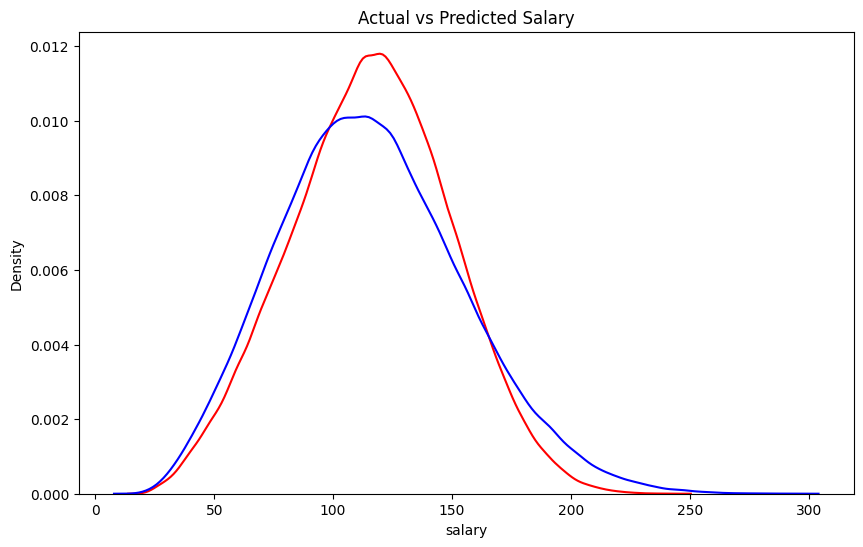

In [46]:
plt.figure(figsize=(10,6))
ax1 = sns.distplot(y_pred, hist = False, color = 'r', label ="Predicted_Salary")
ax1 = sns.distplot(y_test, hist = False, color = 'b', label = "Actual Salary")
plt.title("Actual vs Predicted Salary")
plt.show()
plt.close()

In [47]:
final_result = pd.Series(prediction,name='Salary_Predicted')

In [48]:
final_result

0         125.02
1          97.35
2         179.01
3          99.53
4         108.00
           ...  
999995    170.91
999996     97.88
999997     57.57
999998    146.93
999999    111.26
Name: Salary_Predicted, Length: 1000000, dtype: float64

In [49]:
test1['Salary_Predicted'] = final_result.tolist()


In [50]:
test1

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,Salary_Predicted
0,JOB1362685407687,COMP33,MANAGER,HIGH_SCHOOL,NONE,HEALTH,22,73,125.02
1,JOB1362685407688,COMP13,JUNIOR,NONE,NONE,AUTO,20,47,97.35
2,JOB1362685407689,COMP10,CTO,MASTERS,BIOLOGY,HEALTH,17,9,179.01
3,JOB1362685407690,COMP21,MANAGER,HIGH_SCHOOL,NONE,OIL,14,96,99.53
4,JOB1362685407691,COMP36,JUNIOR,DOCTORAL,BIOLOGY,OIL,10,44,108.00
...,...,...,...,...,...,...,...,...,...
999995,JOB1362686407682,COMP54,VICE_PRESIDENT,BACHELORS,MATH,OIL,14,3,170.91
999996,JOB1362686407683,COMP5,MANAGER,NONE,NONE,HEALTH,20,67,97.88
999997,JOB1362686407684,COMP61,JANITOR,NONE,NONE,OIL,1,91,57.57
999998,JOB1362686407685,COMP19,CTO,DOCTORAL,MATH,OIL,14,63,146.93


In [51]:
test1.to_csv("SocioHood_solution.csv")